# Load Data

In [183]:
seoul <- read.csv("./Data/SeoulAccident.csv", fileEncoding = "CP949", encoding = "UTF-8")
head(seoul)
tail(seoul)

,Year,Month,District,Accident,Deaths,Injured
,<int>,<int>,<fct>,<int>,<int>,<int>
1,2011,1,Jongno,115,2,165
2,2011,2,Jongno,99,0,134
3,2011,3,Jongno,116,0,162
4,2011,4,Jongno,110,1,153
5,2011,5,Jongno,122,0,157
6,2011,6,Jongno,116,3,163


,Year,Month,District,Accident,Deaths,Injured
,<int>,<int>,<fct>,<int>,<int>,<int>
2095,2017,7,Gangdong,90,2,125
2096,2017,8,Gangdong,117,2,151
2097,2017,9,Gangdong,131,1,172
2098,2017,10,Gangdong,143,0,178
2099,2017,11,Gangdong,94,0,124
2100,2017,12,Gangdong,102,2,139


In [184]:
str(seoul)
summary(seoul)

'data.frame':	2100 obs. of  6 variables:
 $ Year    : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ Month   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ District: Factor w/ 25 levels "Dobong","Dongdaemun",..: 13 13 13 13 13 13 13 13 13 13 ...
 $ Accident: int  115 99 116 110 122 116 103 122 121 135 ...
 $ Deaths  : int  2 0 0 1 0 3 1 1 2 2 ...
 $ Injured : int  165 134 162 153 157 163 154 171 166 193 ...


      Year          Month             District       Accident    
 Min.   :2011   Min.   : 1.00   Dobong    :  84   Min.   : 45.0  
 1st Qu.:2012   1st Qu.: 3.75   Dongdaemun:  84   1st Qu.:101.0  
 Median :2014   Median : 6.50   Dongjak   :  84   Median :123.0  
 Mean   :2014   Mean   : 6.50   Eunpyeong :  84   Mean   :134.2  
 3rd Qu.:2016   3rd Qu.: 9.25   Gangbuk   :  84   3rd Qu.:151.0  
 Max.   :2017   Max.   :12.00   Gangdong  :  84   Max.   :378.0  
                                (Other)   :1596                  
     Deaths          Injured     
 Min.   : 0.000   Min.   : 55.0  
 1st Qu.: 0.000   1st Qu.:141.0  
 Median : 1.000   Median :171.0  
 Mean   : 1.288   Mean   :189.7  
 3rd Qu.: 2.000   3rd Qu.:213.0  
 Max.   :10.000   Max.   :552.0  
                                 

# Mean, SD, CV

## Accident

### Mean

#### Calculate average numbers of accidents by District with aggregate

In [185]:
districtAccMean <- aggregate(Accident ~District, data = seoul, mean)
head(districtAccMean)

,District,Accident
,<fct>,<dbl>
1,Dobong,78.28571
2,Dongdaemun,158.69048
3,Dongjak,111.28571
4,Eunpyeong,107.30952
5,Gangbuk,101.19048
6,Gangdong,118.69048


In [186]:
districtAccMean$Accident <- round(districtAccMean$Accident, 3)
head(districtAccMean)

,District,Accident
,<fct>,<dbl>
1,Dobong,78.286
2,Dongdaemun,158.690
3,Dongjak,111.286
4,Eunpyeong,107.310
5,Gangbuk,101.190
6,Gangdong,118.690


#### orderBy

In [187]:
library(doBy)

In [188]:
# Districts where ten most accidents occur on average
orderBy(~-Accident, data = districtAccMean)[1:10,] # ascending order

# Alternatively,
# orderBy(~-Accident, data = districtAccMean[1:10,])

,District,Accident
,<fct>,<dbl>
7,Gangnam,308.405
22,Songpa,220.500
24,Yeongdeungpo,191.548
18,Seocho,181.476
2,Dongdaemun,158.690
8,Gangseo,147.381
16,Mapo,144.274
15,Jungnang,140.107
11,Gwanak,133.369


In [189]:
# Districts where ten least accidents occur on average
orderBy(~Accident, data = districtAccMean)[1:10,]  # decending order

,District,Accident
,<fct>,<dbl>
1,Dobong,78.286
9,Geumcheon,79.131
19,Seodaemun,89.798
21,Seongdong,93.226
5,Gangbuk,101.190
4,Eunpyeong,107.310
12,Gwangjin,107.750
13,Jongno,110.548
3,Dongjak,111.286


### Standard Deviation

#### Calculate standard deviation of accidents by District with aggregate

In [190]:
districtAccSD <- aggregate(Accident ~District, data = seoul, sd)
head(districtAccSD)

,District,Accident
,<fct>,<dbl>
1,Dobong,11.88962
2,Dongdaemun,21.88578
3,Dongjak,16.06206
4,Eunpyeong,20.10453
5,Gangbuk,15.38852
6,Gangdong,14.97224


In [191]:
districtAccSD$Accident <- round(districtAccSD$Accident, 3)
head(districtAccSD)

,District,Accident
,<fct>,<dbl>
1,Dobong,11.890
2,Dongdaemun,21.886
3,Dongjak,16.062
4,Eunpyeong,20.105
5,Gangbuk,15.389
6,Gangdong,14.972


#### orderBy

In [192]:
# Districts with ten largest SD of accidents
orderBy(~-Accident, data = districtAccMean)[1:10,] # ascending order

# Alternatively,
# orderBy(~-Accident, data = districtAccMean[1:10,])

,District,Accident
,<fct>,<dbl>
7,Gangnam,308.405
22,Songpa,220.500
24,Yeongdeungpo,191.548
18,Seocho,181.476
2,Dongdaemun,158.690
8,Gangseo,147.381
16,Mapo,144.274
15,Jungnang,140.107
11,Gwanak,133.369


In [193]:
# Districts with ten smallest SD accidents 
orderBy(~Accident, data = districtAccMean)[1:10,]  # decending order

,District,Accident
,<fct>,<dbl>
1,Dobong,78.286
9,Geumcheon,79.131
19,Seodaemun,89.798
21,Seongdong,93.226
5,Gangbuk,101.190
4,Eunpyeong,107.310
12,Gwangjin,107.750
13,Jongno,110.548
3,Dongjak,111.286


### Coefficient of variation

In [194]:
districtAccSD$Accident / districtAccMean$Accident

[1] 0.1518790 0.1379167 0.1443308 0.1873544 0.1520802 0.1261437 0.1060878
 [8] 0.1309395 0.1862608 0.1320984 0.1706319 0.1955638 0.1501520 0.1422471
[15] 0.1308429 0.1260102 0.1249027 0.1212612 0.1328649 0.1399472 0.1571450
[22] 0.1321134 0.1398809 0.1193330 0.1562341

In [195]:
CV <- round(districtAccSD[2] / districtAccMean[2], 3)
head(CV)

,Accident
,<dbl>
1,0.152
2,0.138
3,0.144
4,0.187
5,0.152
6,0.126


#### Combine data

In [196]:
DistrictAccStat <- cbind(districtAccMean, districtAccSD[2], CV)
head(DistrictAccStat)

,District,Accident,Accident,Accident
,<fct>,<dbl>,<dbl>,<dbl>
1,Dobong,78.286,11.890,0.152
2,Dongdaemun,158.690,21.886,0.138
3,Dongjak,111.286,16.062,0.144
4,Eunpyeong,107.310,20.105,0.187
5,Gangbuk,101.190,15.389,0.152
6,Gangdong,118.690,14.972,0.126


In [197]:
colnames(DistrictAccStat) <- c("District", "Mean", "SD", "CV")
head(DistrictAccStat)

,District,Mean,SD,CV
,<fct>,<dbl>,<dbl>,<dbl>
1,Dobong,78.286,11.890,0.152
2,Dongdaemun,158.690,21.886,0.138
3,Dongjak,111.286,16.062,0.144
4,Eunpyeong,107.310,20.105,0.187
5,Gangbuk,101.190,15.389,0.152
6,Gangdong,118.690,14.972,0.126


In [198]:
orderBy(~-Mean, DistrictAccStat)
orderBy(~-SD, DistrictAccStat)
orderBy(~CV, DistrictAccStat)

,District,Mean,SD,CV
,<fct>,<dbl>,<dbl>,<dbl>
7,Gangnam,308.405,32.718,0.106
22,Songpa,220.500,29.131,0.132
24,Yeongdeungpo,191.548,22.858,0.119
18,Seocho,181.476,22.006,0.121
2,Dongdaemun,158.690,21.886,0.138
8,Gangseo,147.381,19.298,0.131
16,Mapo,144.274,18.180,0.126
15,Jungnang,140.107,18.332,0.131
11,Gwanak,133.369,22.757,0.171


,District,Mean,SD,CV
,<fct>,<dbl>,<dbl>,<dbl>
7,Gangnam,308.405,32.718,0.106
22,Songpa,220.500,29.131,0.132
24,Yeongdeungpo,191.548,22.858,0.119
11,Gwanak,133.369,22.757,0.171
18,Seocho,181.476,22.006,0.121
2,Dongdaemun,158.690,21.886,0.138
12,Gwangjin,107.750,21.072,0.196
4,Eunpyeong,107.310,20.105,0.187
8,Gangseo,147.381,19.298,0.131


,District,Mean,SD,CV
,<fct>,<dbl>,<dbl>,<dbl>
7,Gangnam,308.405,32.718,0.106
24,Yeongdeungpo,191.548,22.858,0.119
18,Seocho,181.476,22.006,0.121
17,Nowon,127.179,15.885,0.125
6,Gangdong,118.690,14.972,0.126
16,Mapo,144.274,18.180,0.126
8,Gangseo,147.381,19.298,0.131
15,Jungnang,140.107,18.332,0.131
10,Guro,125.679,16.602,0.132


- Now we can see that Gangnam district records the highest number of accidents. While the standard deviation of accident in Gangnam is also high, coefficnent of variance confirms that the district is also the area where consistently occurs car accidents.

In [199]:
library(ggplot2)

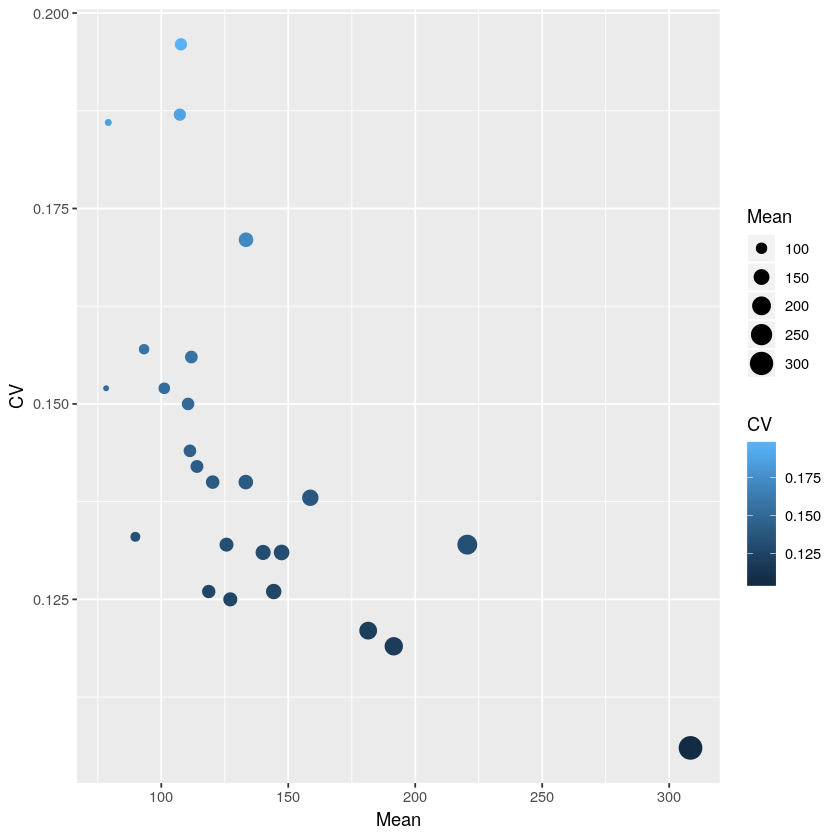

In [200]:
qplot(Mean, CV, data = DistrictAccStat, size = Mean, col = CV)

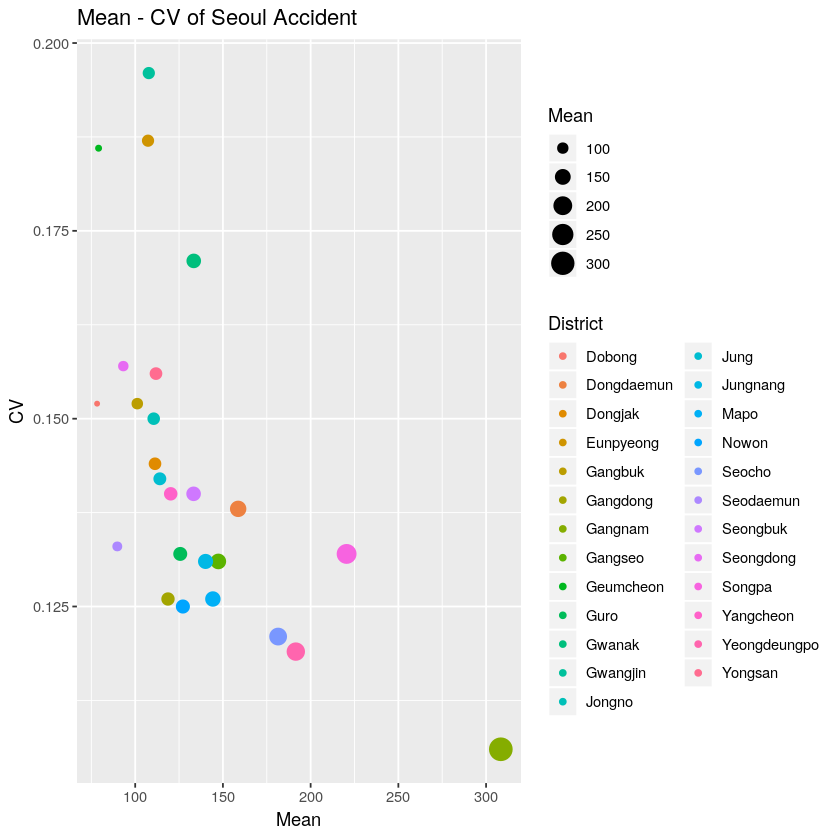

In [201]:
g <- ggplot(DistrictAccStat, aes(x = Mean, y = CV, color = District, size = Mean)) +
  geom_point() 
g + labs(title = "Mean - CV of Seoul Accident")

## Deaths

### Mean

In [202]:
### Calculate average numbers of deaths by District with aggregate

districtDeathsMean <- aggregate(Deaths ~District, data = seoul, mean)
head(districtDeathsMean)

districtDeathsMean$Deaths <- round(districtDeathsMean$Deaths, 3)
head(districtDeathsMean)

,District,Deaths
,<fct>,<dbl>
1,Dobong,0.9642857
2,Dongdaemun,1.5595238
3,Dongjak,1.1547619
4,Eunpyeong,1.2380952
5,Gangbuk,0.9285714
6,Gangdong,1.3809524


,District,Deaths
,<fct>,<dbl>
1,Dobong,0.964
2,Dongdaemun,1.560
3,Dongjak,1.155
4,Eunpyeong,1.238
5,Gangbuk,0.929
6,Gangdong,1.381


In [203]:
### orderBy

In [204]:
# Districts where ten most deaths occur on average
orderBy(~-Deaths, data = districtDeathsMean)[1:10,] # ascending order

# Alternatively,
# orderBy(~-Deaths, data = districtDeathsMean[1:10,])

# Districts where ten least deaths occur on average
orderBy(~Deaths, data = districtDeathsMean)[1:10,]  # decending order

,District,Deaths
,<fct>,<dbl>
24,Yeongdeungpo,2.226
7,Gangnam,1.905
22,Songpa,1.762
8,Gangseo,1.619
2,Dongdaemun,1.560
18,Seocho,1.560
16,Mapo,1.536
11,Gwanak,1.440
6,Gangdong,1.381


,District,Deaths
,<fct>,<dbl>
14,Jung,0.845
15,Jungnang,0.881
5,Gangbuk,0.929
13,Jongno,0.952
1,Dobong,0.964
25,Yongsan,0.988
21,Seongdong,1.000
9,Geumcheon,1.012
19,Seodaemun,1.095


### Standard Deviation

In [205]:
### Calculate standard deviation of deaths by District with aggregate

districtDeathsSD <- aggregate(Deaths ~District, data = seoul, sd)
head(districtDeathsSD)

districtDeathsSD$Deaths <- round(districtDeathsSD$Deaths, 3)
head(districtDeathsSD)

### orderBy

# Districts with ten largest SD of deaths
orderBy(~-Deaths, data = districtDeathsSD)[1:10,] # ascending order

# Alternatively,
# orderBy(~-Accident, data = districtDeathsMean[1:10,])

# Districts with ten smallest SD deaths 
orderBy(~Deaths, data = districtDeathsSD)[1:10,]  # decending order

,District,Deaths
,<fct>,<dbl>
1,Dobong,0.9625071
2,Dongdaemun,1.4508094
3,Dongjak,1.1246852
4,Eunpyeong,1.0014333
5,Gangbuk,0.9286045
6,Gangdong,0.9928026


,District,Deaths
,<fct>,<dbl>
1,Dobong,0.963
2,Dongdaemun,1.451
3,Dongjak,1.125
4,Eunpyeong,1.001
5,Gangbuk,0.929
6,Gangdong,0.993


,District,Deaths
,<fct>,<dbl>
16,Mapo,1.517
7,Gangnam,1.486
2,Dongdaemun,1.451
22,Songpa,1.376
8,Gangseo,1.334
24,Yeongdeungpo,1.302
18,Seocho,1.274
20,Seongbuk,1.247
10,Guro,1.238


,District,Deaths
,<fct>,<dbl>
13,Jongno,0.820
17,Nowon,0.920
5,Gangbuk,0.929
25,Yongsan,0.938
1,Dobong,0.963
15,Jungnang,0.987
6,Gangdong,0.993
4,Eunpyeong,1.001
19,Seodaemun,1.013


### Coefficient of variation

In [206]:
districtDeathsSD$Deaths / districtDeathsMean$Deaths

CV <- round(districtDeathsSD[2] / districtDeathsMean[2], 3)
head(CV)

[1] 0.9989627 0.9301282 0.9740260 0.8085622 1.0000000 0.7190442 0.7800525
 [8] 0.8239654 1.1324111 0.9123066 0.8166667 0.8828756 0.8613445 1.3053254
[15] 1.1203178 0.9876302 0.8048994 0.8166667 0.9251142 0.9696734 1.0180000
[22] 0.7809308 1.0688114 0.5849057 0.9493927

,Deaths
,<dbl>
1,0.999
2,0.930
3,0.974
4,0.809
5,1.000
6,0.719


### Combine data

In [207]:
DistrictDeathsStat <- cbind(districtDeathsMean, districtDeathsSD[2], CV)
head(DistrictDeathsStat)

colnames(DistrictDeathsStat) <- c("District", "Mean", "SD", "CV")
head(DistrictDeathsStat)

,District,Deaths,Deaths,Deaths
,<fct>,<dbl>,<dbl>,<dbl>
1,Dobong,0.964,0.963,0.999
2,Dongdaemun,1.560,1.451,0.930
3,Dongjak,1.155,1.125,0.974
4,Eunpyeong,1.238,1.001,0.809
5,Gangbuk,0.929,0.929,1.000
6,Gangdong,1.381,0.993,0.719


,District,Mean,SD,CV
,<fct>,<dbl>,<dbl>,<dbl>
1,Dobong,0.964,0.963,0.999
2,Dongdaemun,1.560,1.451,0.930
3,Dongjak,1.155,1.125,0.974
4,Eunpyeong,1.238,1.001,0.809
5,Gangbuk,0.929,0.929,1.000
6,Gangdong,1.381,0.993,0.719


In [208]:
orderBy(~-Mean, DistrictDeathsStat)
orderBy(~-SD, DistrictDeathsStat)
orderBy(~CV, DistrictDeathsStat)

,District,Mean,SD,CV
,<fct>,<dbl>,<dbl>,<dbl>
24,Yeongdeungpo,2.226,1.302,0.585
7,Gangnam,1.905,1.486,0.780
22,Songpa,1.762,1.376,0.781
8,Gangseo,1.619,1.334,0.824
2,Dongdaemun,1.560,1.451,0.930
18,Seocho,1.560,1.274,0.817
16,Mapo,1.536,1.517,0.988
11,Gwanak,1.440,1.176,0.817
6,Gangdong,1.381,0.993,0.719


,District,Mean,SD,CV
,<fct>,<dbl>,<dbl>,<dbl>
16,Mapo,1.536,1.517,0.988
7,Gangnam,1.905,1.486,0.780
2,Dongdaemun,1.560,1.451,0.930
22,Songpa,1.762,1.376,0.781
8,Gangseo,1.619,1.334,0.824
24,Yeongdeungpo,2.226,1.302,0.585
18,Seocho,1.560,1.274,0.817
20,Seongbuk,1.286,1.247,0.970
10,Guro,1.357,1.238,0.912


,District,Mean,SD,CV
,<fct>,<dbl>,<dbl>,<dbl>
24,Yeongdeungpo,2.226,1.302,0.585
6,Gangdong,1.381,0.993,0.719
7,Gangnam,1.905,1.486,0.780
22,Songpa,1.762,1.376,0.781
17,Nowon,1.143,0.920,0.805
4,Eunpyeong,1.238,1.001,0.809
11,Gwanak,1.440,1.176,0.817
18,Seocho,1.560,1.274,0.817
8,Gangseo,1.619,1.334,0.824


Yeongdeungpo district shows the highest number of deaths by car accidents. The low CV of Yeongdeungpo also tell us that the deaths occurs consistently around the average, which is the highest among districts in Seoul.

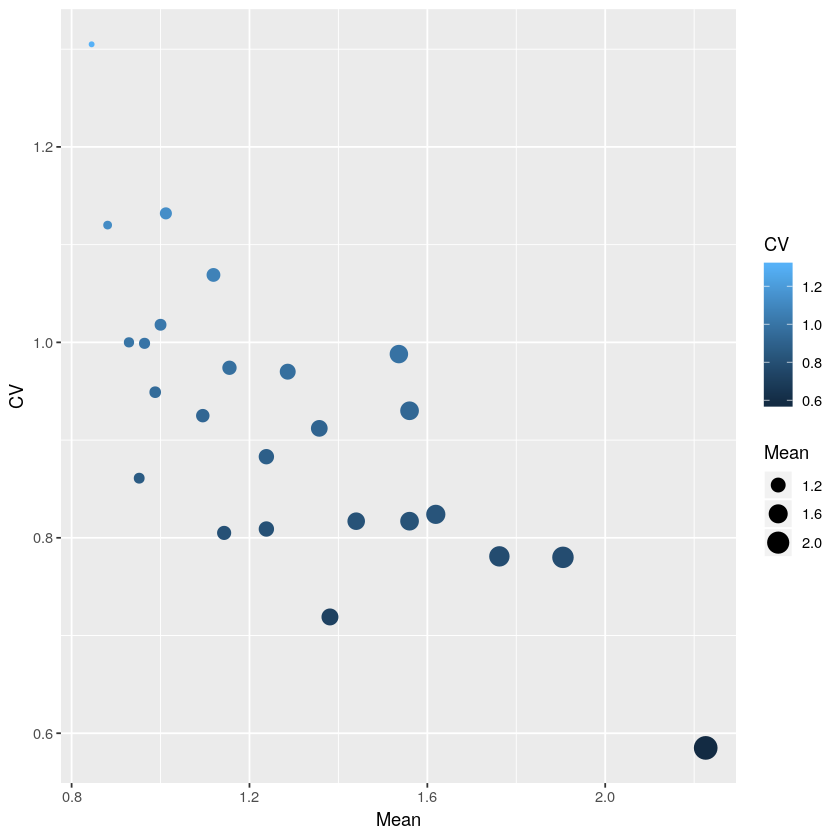

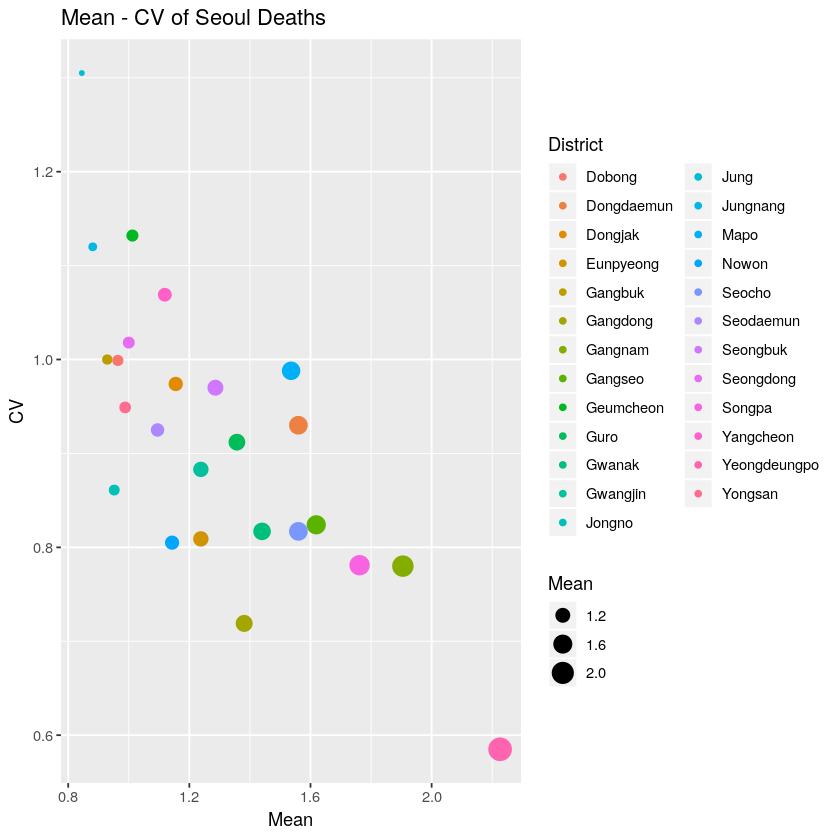

In [209]:
qplot(Mean, CV, data = DistrictDeathsStat, size = Mean, col = CV)

g <- ggplot(DistrictDeathsStat, aes(x = Mean, y = CV, color = District, size = Mean)) +
  geom_point() 
g + labs(title = "Mean - CV of Seoul Deaths")

## Injured

### Mean

In [210]:
### Calculate average numbers of people injured by District with aggregate

districtInjuredMean <- aggregate(Injured ~District, data = seoul, mean)
head(districtInjuredMean)

districtInjuredMean$Injured <- round(districtInjuredMean$Injured, 3)
head(districtInjuredMean)

### orderBy

# Districts where ten most deaths occur on average
orderBy(~-Injured, data = districtInjuredMean)[1:10,] # ascending order

# Alternatively,
# orderBy(~-Injured, data = districtDeathsMean[1:10,])

# Districts where ten least injuries occur on average
orderBy(~Injured, data = districtInjuredMean)[1:10,]  # decending order

,District,Injured
,<fct>,<dbl>
1,Dobong,105.2024
2,Dongdaemun,206.8095
3,Dongjak,157.1071
4,Eunpyeong,149.2857
5,Gangbuk,137.5595
6,Gangdong,166.9524


,District,Injured
,<fct>,<dbl>
1,Dobong,105.202
2,Dongdaemun,206.810
3,Dongjak,157.107
4,Eunpyeong,149.286
5,Gangbuk,137.560
6,Gangdong,166.952


,District,Injured
,<fct>,<dbl>
7,Gangnam,446.845
22,Songpa,310.679
18,Seocho,280.143
24,Yeongdeungpo,277.905
16,Mapo,218.881
8,Gangseo,209.417
2,Dongdaemun,206.810
15,Jungnang,188.845
10,Guro,180.810


,District,Injured
,<fct>,<dbl>
1,Dobong,105.202
9,Geumcheon,117.595
19,Seodaemun,128.536
21,Seongdong,130.238
5,Gangbuk,137.560
4,Eunpyeong,149.286
12,Gwangjin,153.226
13,Jongno,153.786
14,Jung,154.833


### Standard Deviation

In [211]:
### Calculate standard deviation of people injured by District with aggregate

districtInjuredSD <- aggregate(Injured ~District, data = seoul, sd)
head(districtInjuredSD)

districtInjuredSD$Injured <- round(districtInjuredSD$Injured, 3)
head(districtInjuredSD)

### orderBy

# Districts with ten largest SD of deaths
orderBy(~-Injured, data = districtInjuredSD)[1:10,] # ascending order

# Alternatively,
# orderBy(~-Injured, data = districtInjuredSD[1:10,])

# Districts with ten smallest SD deaths 
orderBy(~Injured, data = districtInjuredSD)[1:10,]  # decending order

,District,Injured
,<fct>,<dbl>
1,Dobong,18.22337
2,Dongdaemun,30.71065
3,Dongjak,23.68163
4,Eunpyeong,30.58765
5,Gangbuk,19.06953
6,Gangdong,22.54201


,District,Injured
,<fct>,<dbl>
1,Dobong,18.223
2,Dongdaemun,30.711
3,Dongjak,23.682
4,Eunpyeong,30.588
5,Gangbuk,19.070
6,Gangdong,22.542


,District,Injured
,<fct>,<dbl>
7,Gangnam,49.650
18,Seocho,39.493
22,Songpa,39.460
24,Yeongdeungpo,35.171
16,Mapo,34.067
8,Gangseo,33.028
12,Gwangjin,32.816
11,Gwanak,32.516
2,Dongdaemun,30.711


,District,Injured
,<fct>,<dbl>
1,Dobong,18.223
5,Gangbuk,19.070
21,Seongdong,21.303
19,Seodaemun,21.646
14,Jung,22.136
6,Gangdong,22.542
17,Nowon,23.159
3,Dongjak,23.682
13,Jongno,23.889


### Coefficient of variation

In [212]:
districtInjuredSD$Deaths / districtInjuredMean$Deaths

CV <- round(districtInjuredSD[2] / districtInjuredMean[2], 3)
head(CV)

numeric(0)

,Injured
,<dbl>
1,0.173
2,0.148
3,0.151
4,0.205
5,0.139
6,0.135


In [213]:
districtDeathsSD$Deaths / districtDeathsSD$Accident

CV <- round(districtDeathsSD[2] / districtDeathsMean[2], 3)
head(CV)

numeric(0)

,Deaths
,<dbl>
1,0.999
2,0.930
3,0.974
4,0.809
5,1.000
6,0.719


### Combine data

In [214]:
# 여기서부터
DistrictInjuredStat <- cbind(districtInjuredMean, districtInjuredSD[2], CV)
head(DistrictInjuredStat)

colnames(DistrictInjuredStat) <- c("District", "Mean", "SD", "CV")
head(DistrictInjuredStat)

,District,Injured,Injured,Deaths
,<fct>,<dbl>,<dbl>,<dbl>
1,Dobong,105.202,18.223,0.999
2,Dongdaemun,206.810,30.711,0.930
3,Dongjak,157.107,23.682,0.974
4,Eunpyeong,149.286,30.588,0.809
5,Gangbuk,137.560,19.070,1.000
6,Gangdong,166.952,22.542,0.719


,District,Mean,SD,CV
,<fct>,<dbl>,<dbl>,<dbl>
1,Dobong,105.202,18.223,0.999
2,Dongdaemun,206.810,30.711,0.930
3,Dongjak,157.107,23.682,0.974
4,Eunpyeong,149.286,30.588,0.809
5,Gangbuk,137.560,19.070,1.000
6,Gangdong,166.952,22.542,0.719


In [176]:
orderBy(~-Mean, DistrictInjuredStat)
orderBy(~-SD, DistrictInjuredStat)
orderBy(~CV, DistrictInjuredStat)

,District,Mean,SD,CV
,<fct>,<dbl>,<dbl>,<dbl>
7,Gangnam,446.845,49.650,0.111
22,Songpa,310.679,39.460,0.127
18,Seocho,280.143,39.493,0.141
24,Yeongdeungpo,277.905,35.171,0.127
16,Mapo,218.881,34.067,0.156
8,Gangseo,209.417,33.028,0.158
2,Dongdaemun,206.810,30.711,0.148
15,Jungnang,188.845,26.155,0.138
10,Guro,180.810,26.860,0.149


,District,Mean,SD,CV
,<fct>,<dbl>,<dbl>,<dbl>
7,Gangnam,446.845,49.650,0.111
18,Seocho,280.143,39.493,0.141
22,Songpa,310.679,39.460,0.127
24,Yeongdeungpo,277.905,35.171,0.127
16,Mapo,218.881,34.067,0.156
8,Gangseo,209.417,33.028,0.158
12,Gwangjin,153.226,32.816,0.214
11,Gwanak,180.750,32.516,0.180
2,Dongdaemun,206.810,30.711,0.148


,District,Mean,SD,CV
,<fct>,<dbl>,<dbl>,<dbl>
7,Gangnam,446.845,49.650,0.111
22,Songpa,310.679,39.460,0.127
24,Yeongdeungpo,277.905,35.171,0.127
17,Nowon,180.274,23.159,0.128
6,Gangdong,166.952,22.542,0.135
15,Jungnang,188.845,26.155,0.138
5,Gangbuk,137.560,19.070,0.139
18,Seocho,280.143,39.493,0.141
14,Jung,154.833,22.136,0.143


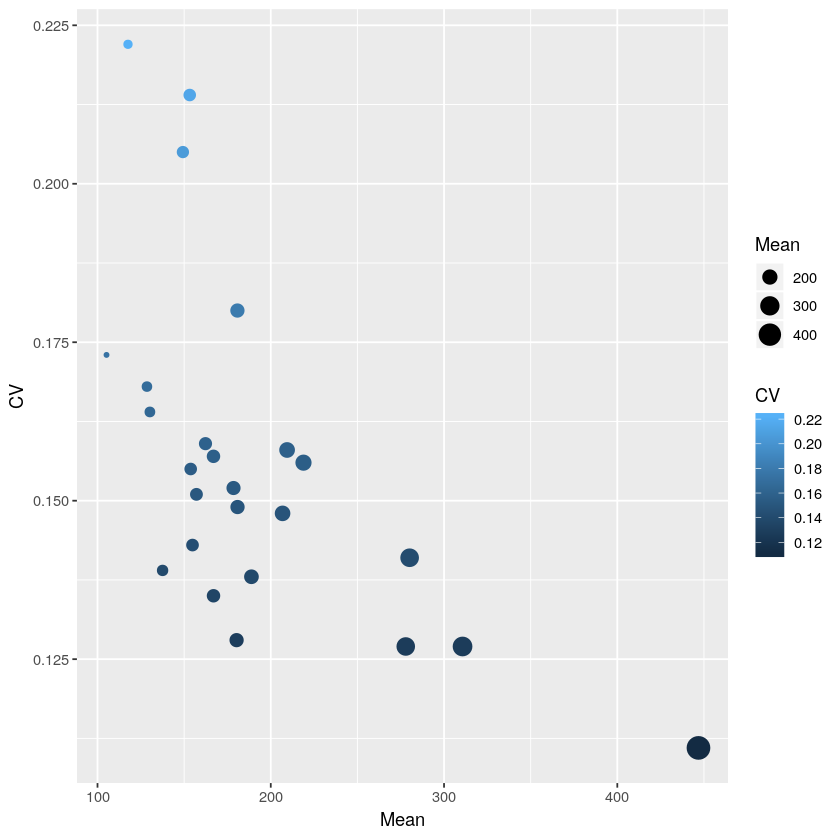

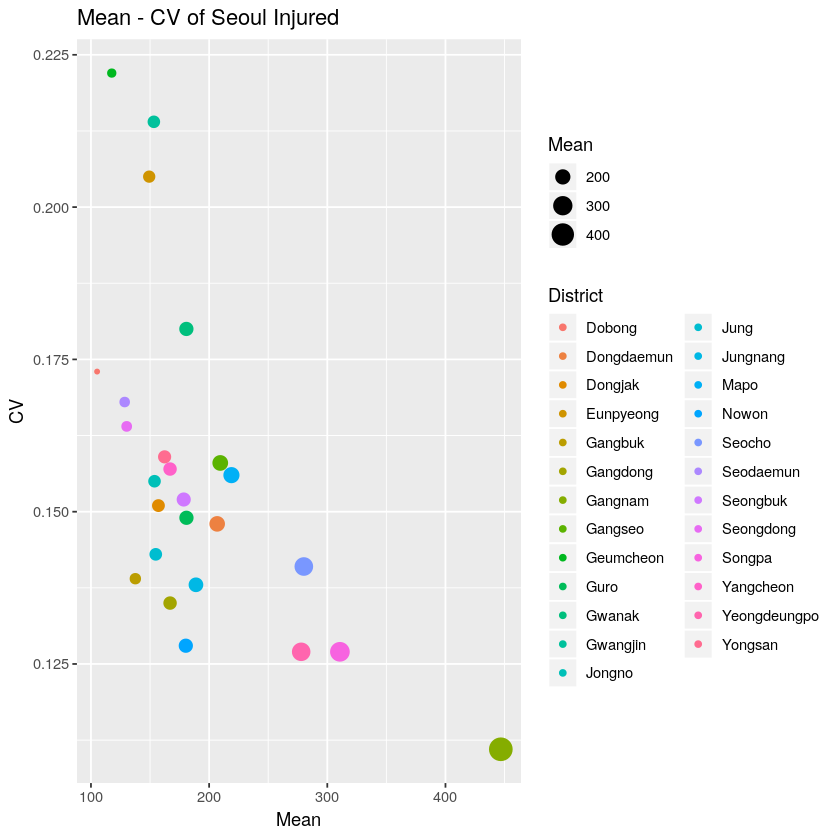

In [179]:
qplot(Mean, CV, data = DistrictInjuredStat, size = Mean, col = CV)

g <- ggplot(DistrictInjuredStat, aes(x = Mean, y = CV, color = District, size = Mean)) +
  geom_point() 
g + labs(title = "Mean - CV of Seoul Injured")

# Correlation

In [218]:
cor(seoul[4:6])

,Accident,Deaths,Injured
Accident,1.0000000,0.2295247,0.9796363
Deaths,0.2295247,1.0000000,0.2274515
Injured,0.9796363,0.2274515,1.0000000


In [217]:
head(seoul)

,Year,Month,District,Accident,Deaths,Injured
,<int>,<int>,<fct>,<int>,<int>,<int>
1,2011,1,Jongno,115,2,165
2,2011,2,Jongno,99,0,134
3,2011,3,Jongno,116,0,162
4,2011,4,Jongno,110,1,153
5,2011,5,Jongno,122,0,157
6,2011,6,Jongno,116,3,163
